# Description du projet
Dans ce projet, la mission est de faire une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion. Nous essayerons de répondre aux questions suivantes: 

- Quels sont les pays avec un fort potentiel de clients pour nos services ? (Voir les variables qui nous interessent)
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

            

# I. Nettoyages des données

In [1]:
#Importation des librairies nécessaires à l'étude du projet 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Chargement des données (tout ce qui a été fourni)

ed_stats_data = pd.read_csv("Data/EdStatsData.csv")
ed_stats_country = pd.read_csv("Data/EdStatsCountry.csv")
ed_stats_country_series = pd.read_csv("Data/EdStatsCountry-Series.csv")
ed_stats_footnote = pd.read_csv("Data/EdStatsFootNote.csv")
ed_stats_series = pd.read_csv("Data/EdStatsSeries.csv")

In [3]:
ed_stats_data               #=> 886930 rows × 70 columns
#ed_stats_country            #=>241 rows × 32 columns
#ed_stats_country_series    #=> 613 rows × 4 columns
#ed_stats_footnote          #=> 643638 rows × 5 columns
#ed_stats_series            #=> 3665 rows × 21 columns

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## a/ Observations des données brutes

- Définitions de fonctions permettant l'observarions statistiques des données

In [4]:
def nb_cells(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le nombre de cellules au total
    return data.size

def nb_lines(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le nombre de lignes
    return len(data)

def nb_columns(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le nombre de colonnes
    return len(data.columns)

def missing_cells(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le nbre cellule manquante total
    #return data.isna().sum()# Ici on calcul le nomre de cellules manquantes en fonction de chaque colonne
    return data.isna().sum().sum()

def missing_cells_percent(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le % de cellule manquante
    return data.isna().sum().sum()/(data.size)

def count_duplicates_rows(data):
    #Fonction qui prend en entrée une dataFrame et renvoie le nbre de ligne dupliquée
    return len(data)-len(data.drop_duplicates())

def count_duplicates_rows_percent(data):
   #Fonction qui prend en entrée une dataFrame et renvoie le % de ligne dupliquée
    return count_duplicates_rows(data)/nb_lines(data)

def count_data_type(data):
   #Fonction qui prend en entrée une dataFrame et renvoie le % de ligne dupliquée
    return ed_stats_data.dtypes.value_counts()

def namestr(obj, namespace):
    #Fonction qui renvoie le nom d'une variable dans l'espace namespace
    return [name for name in namespace if namespace[name] is obj]




def vue_generale_data(data):    
    #Fonction qui prend un jeux de données et qui renvoie certaines de ses caractéristiques

    print('--------------------------------------------------------------------------')
    print('Donnée : {}'.format(namestr(data, globals())))
    print('Nombre de variable : {}'.format(nb_columns(data)))
    print('Nomres de types de variables : {}'.format(count_data_type(data)))
    print('Nombre observation : {}'.format(nb_lines(data)))
    print('Nombre de cellules manquantes : {}'.format(missing_cells(data)))
    print('% de cellules manquantes : {:.2%}'.format(missing_cells_percent(data)))
    print('Nombre de lignes dupliquées : {}'.format(count_duplicates_rows(data)))
    print('% de lignes dupliquées : {:.2%}'.format(count_duplicates_rows_percent(data)))
    
    return None


def vue_general_variable(data):
    #Fonction qui prend en entrée un dataFrame et qui fait un résumé des Variables de cette dataFrame: le nom,
    #le type
        
    print('--------------------------------------------------------------------------')
    print('Nom de la Donnée : {}'.format(namestr(data, globals())))
    print('--------------------------------------------------------------------------')
    df = pd.DataFrame(columns=['Nom variable','Type de la variable','nbre observation','Valeurs manquantes','% Valeurs manquantes', 'Moyenne', 'Mediane','Variance','Stdev' 'min','25%','50%','75%','max'])
    for column in data.columns:
        type_var = data[column].dtypes
        nombre_obs = len(data[column].unique())     
        val_manquantes = missing_cells(data[column])
        perc_val_manquantes = missing_cells_percent(data[column])
        if type_var != 'object':       
            df = df.append(pd.DataFrame([[column,type_var,nombre_obs,val_manquantes,perc_val_manquantes,data[column].mean(),data[column].median(),data[column].var(ddof=0),
                                          data[column].std(ddof=0),data[column].min(),data[column].quantile(0.25),data[column].quantile(0.5),data[column].quantile(0.75),data[column].max()]], columns=['Nom variable','Type de la variable','nbre observation','Valeurs manquantes','% Valeurs manquantes', 'Moyenne', 'Mediane','Variance','Stdev' ,'min','25%','50%','75%','max']))
        else:            
            df = df.append(pd.DataFrame([[column,type_var,nombre_obs,val_manquantes,perc_val_manquantes,'','','','','','',''
                                    ,'','']], columns=['Nom variable','Type de la variable','nbre observation','Valeurs manquantes','% Valeurs manquantes', 'Moyenne', 'Mediane','Variance','Stdev' ,'min','25%','50%','75%','max']))
               
    return df

- Vue générale des différents jeux de données

In [5]:
#ed_stats_data
vue_generale_data(ed_stats_data)# Données brutes (principales)

--------------------------------------------------------------------------
Donnée : ['_', 'ed_stats_data', '_3']
Nombre de variable : 70
Nomres de types de variables : float64    66
object      4
dtype: int64
Nombre observation : 886930
Nombre de cellules manquantes : 53455179
% de cellules manquantes : 86.10%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%


In [6]:
#ed_stats_country
vue_generale_data(ed_stats_country) 

--------------------------------------------------------------------------
Donnée : ['ed_stats_country']
Nombre de variable : 32
Nomres de types de variables : float64    66
object      4
dtype: int64
Nombre observation : 241
Nombre de cellules manquantes : 2354
% de cellules manquantes : 30.52%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%


In [7]:
#ed_stats_country_series
vue_generale_data(ed_stats_country_series) 

--------------------------------------------------------------------------
Donnée : ['ed_stats_country_series']
Nombre de variable : 4
Nomres de types de variables : float64    66
object      4
dtype: int64
Nombre observation : 613
Nombre de cellules manquantes : 613
% de cellules manquantes : 25.00%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%


In [8]:
#ed_stats_footnote
vue_generale_data(ed_stats_footnote)

--------------------------------------------------------------------------
Donnée : ['ed_stats_footnote']
Nombre de variable : 5
Nomres de types de variables : float64    66
object      4
dtype: int64
Nombre observation : 643638
Nombre de cellules manquantes : 643638
% de cellules manquantes : 20.00%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%


In [9]:
#ed_stats_series
vue_generale_data(ed_stats_series) 

--------------------------------------------------------------------------
Donnée : ['ed_stats_series']
Nombre de variable : 21
Nomres de types de variables : float64    66
object      4
dtype: int64
Nombre observation : 3665
Nombre de cellules manquantes : 55203
% de cellules manquantes : 71.72%
Nombre de lignes dupliquées : 0
% de lignes dupliquées : 0.00%


- Statistiques de base: Vue des donnes en fonctions de chaque varaible

In [10]:
vue_general_variable(ed_stats_data)

--------------------------------------------------------------------------
Nom de la Donnée : ['_', 'ed_stats_data', '_3']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,Country Name,object,242,0,0.000000,,,,NaN,,,,,,
0,Country Code,object,242,0,0.000000,,,,NaN,,,,,,
0,Indicator Name,object,3665,0,0.000000,,,,NaN,,,,,,
0,Indicator Code,object,3665,0,0.000000,,,,NaN,,,,,,
0,1970,float64,24596,814642,0.918496,1974772449.585505,6.317724,14681647207758488928256.0,NaN,0.89,6.317724,62.5125,19039286948196.101562,121167847252.307358,-1.435564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2085,float64,7336,835494,0.942007,717.68987,0.23,623282336.159811,NaN,0.01,0.23,6.08,3337871.21,24965.623088,-0.78
0,2090,float64,7151,835494,0.942007,711.307183,0.23,640169984.860845,NaN,0.01,0.23,5.4625,3354746.27,25301.580679,-0.65
0,2095,float64,7045,835494,0.942007,703.42738,0.23,653336233.770737,NaN,0.01,0.23,4.68,3351886.89,25560.442754,-0.55
0,2100,float64,6915,835494,0.942007,694.029624,0.22,662632167.070786,NaN,0.01,0.22,4.0325,3330483.54,25741.642665,-0.45


In [11]:
vue_general_variable(ed_stats_country)

--------------------------------------------------------------------------
Nom de la Donnée : ['ed_stats_country']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,Country Code,object,241,0,0.000000,,,,NaN,,,,,,
0,Short Name,object,241,0,0.000000,,,,NaN,,,,,,
0,Table Name,object,241,0,0.000000,,,,NaN,,,,,,
0,Long Name,object,241,0,0.000000,,,,NaN,,,,,,
0,2-alpha code,object,239,3,0.012448,,,,NaN,,,,,,
0,Currency Unit,object,153,26,0.107884,,,,NaN,,,,,,
0,Special Notes,object,132,96,0.398340,,,,NaN,,,,,,
0,Region,object,8,27,0.112033,,,,NaN,,,,,,
0,Income Group,object,6,27,0.112033,,,,NaN,,,,,,
0,WB-2 code,object,241,1,0.004149,,,,NaN,,,,,,


In [12]:
vue_general_variable(ed_stats_country_series)

--------------------------------------------------------------------------
Nom de la Donnée : ['ed_stats_country_series']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,CountryCode,object,211,0,0.0,,,,NaN,,,,,,
0,SeriesCode,object,21,0,0.0,,,,NaN,,,,,,
0,DESCRIPTION,object,97,0,0.0,,,,NaN,,,,,,
0,Unnamed: 3,float64,1,613,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
vue_general_variable(ed_stats_footnote)

--------------------------------------------------------------------------
Nom de la Donnée : ['ed_stats_footnote']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,CountryCode,object,239,0,0.0,,,,NaN,,,,,,
0,SeriesCode,object,1558,0,0.0,,,,NaN,,,,,,
0,Year,object,56,0,0.0,,,,NaN,,,,,,
0,DESCRIPTION,object,9102,0,0.0,,,,NaN,,,,,,
0,Unnamed: 4,float64,1,643638,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
vue_general_variable(ed_stats_series)

--------------------------------------------------------------------------
Nom de la Donnée : ['ed_stats_series']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,Series Code,object,3665,0,0.000000,,,,NaN,,,,,,
0,Topic,object,37,0,0.000000,,,,NaN,,,,,,
0,Indicator Name,object,3665,0,0.000000,,,,NaN,,,,,,
0,Short definition,object,1170,1509,0.411733,,,,NaN,,,,,,
0,Long definition,object,2060,0,0.000000,,,,NaN,,,,,,
0,Unit of measure,float64,1,3665,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Periodicity,object,2,3566,0.972988,,,,NaN,,,,,,
0,Base Period,object,5,3351,0.914325,,,,NaN,,,,,,
0,Other notes,object,15,3113,0.849386,,,,NaN,,,,,,
0,Aggregation method,object,4,3618,0.987176,,,,NaN,,,,,,


### Résumé
- ed_stats_data: contient l'ensembles des indicateurs, des pays, et les dates d'invsetigations
- ed_stas_country: contient l'ensemble de pays, leur code, et les regions du monde auxquelles ils appartiennet
- ed_stats_country_series: les codes des pays, les codes des indicateurs et leurs sources
- ed_stats_footnote: Les codes des pays, les SeriesCods et leur description
- ed_stats_series: contient les différents indicateurs et les descriptions

### Observation graphique des données (pour voir les données manquantes)

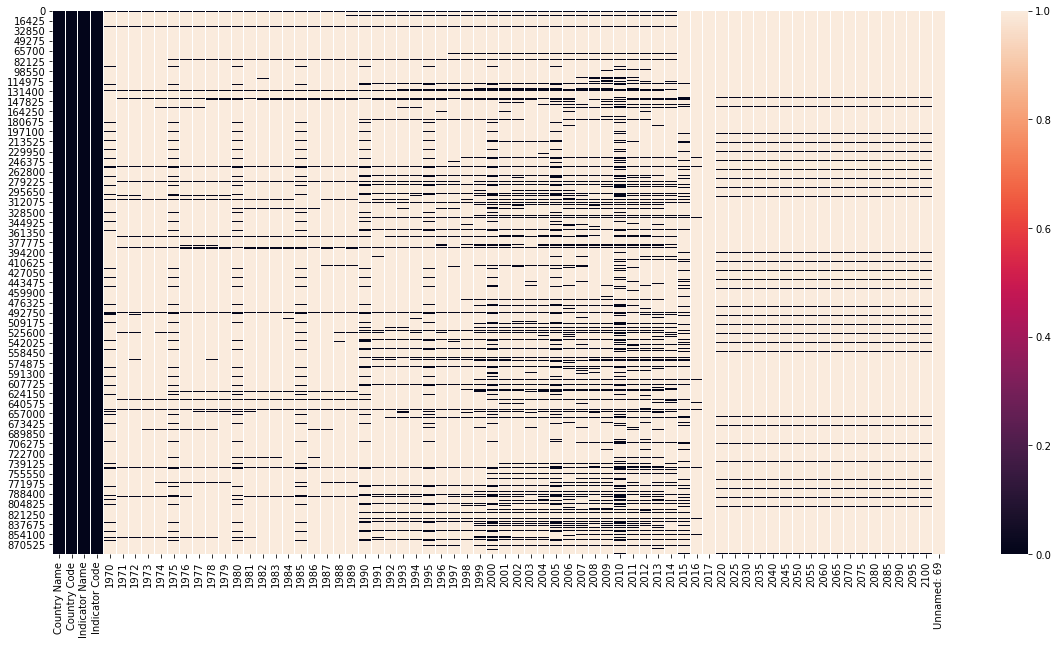

In [15]:
#Affichage de l'ensemble du dataset
plt.figure(figsize=(20,10))
sns.heatmap(ed_stats_data.isna())#=> Aperçu des données manquantes d'un point de vue general
#sns.heatmap(ed_stats_country.isna())#=> Aperçu des données manquantes d'un point de vue general
#sns.heatmap(ed_stats_country_series.isna())#=> Aperçu des données manquantes d'un point de vue general
#sns.heatmap(ed_stats_footnote.isna())#=> Aperçu des données manquantes d'un point de vue general
#sns.heatmap(ed_stats_series.isna())#=> Aperçu des données manquantes d'un point de vue general

## b/ Choix des indicateurs et premier filtre de nettoyage

### Choix des indicateurs
NB: Nous allons utilisé 3 jeux de données pour le choix des indicateurs: 
- ed_stats_data: contient l'ensembles des indicateurs, des pays, et les dates d'invsetigations
- ed_stats_country: contient l'ensemble de pays, leur code, et les regions du monde auxquelles ils appartiennet
- ed_stats_series: contient les différents indicateurs et les descriptions

### Premier filtre de nottoyage en fonction des indicateurs trouvés et les variables qui nous interessent
#### Etapes: 
- dans un premier temps cherché par mots dans les données ed_stats_series quelques indicateurs qui nous interessent
- puis nous allons filtré les données principales ed_stats_data en fonction des indicateurs trouvés
- filtrer les données Ed_stats_country pour ne garder que le contry code, la région et les revenus
- Enfin, nous avons mergé (combiné) les données d'Ed_stats_country filtré et les données ed_stats_data filtré

In [15]:
# Choix des indicateurs en fonction de nos centres d'interêt (internet, lycée, université, augmentation de la population, ordi...)
# Ici, on utilise les données du fichier ed_stats_series qui comporte l'ensembles  des indicateurs et leur description

mot_clef_indicateurs = ['Internet','high-school','university','15-19','20-24', 'population growth', 'computers']
indicateurs_trouves = ed_stats_series[ed_stats_series['Long definition'].str.contains('|'.join(mot_clef_indicateurs))]

print("On trouve {} indicateurs contenant les mots clefs choisis: {}".format(len(indicateurs_trouves),mot_clef_indicateurs))
print('-------------------------------------------------')
print("Les grandes familles d indicaurs sont : {}".format(indicateurs_trouves['Topic'].unique()))
print('-------------------------------------------------')
indicateurs_trouves #On arrive à 73 indicateurs

On trouve 73 indicateurs contenant les mots clefs choisis: ['Internet', 'high-school', 'university', '15-19', '20-24', 'population growth', 'computers']
-------------------------------------------------
Les grandes familles d indicaurs sont : ['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes' 'Health: Population: Dynamics']
-------------------------------------------------


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BAR.NOED.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with no edu...,Percentage of population age 20-24 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,BAR.POP.1519,Attainment,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, 15-19, total is the t...","Population in thousands, age 15-19, total is t...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1366,LO.PIAAC.TEC.OPT,Learning Outcomes,PIAAC: Adults by proficiency level in problem ...,Adults in this category opted to take the pape...,Adults in this category opted to take the pape...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,OECD Programme for the International Assessmen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1379,LO.PIAAC.TEC.YOU.OPT,Learning Outcomes,PIAAC: Young adults by proficiency level in pr...,Percentage of young (age 16-24) adults who opt...,Percentage of young (age 16-24) adults who opt...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,OECD Programme for the International Assessmen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Dans les indicateurs trouvés, on peut voir la description concernant chanque indicateur
# Ici les Seris sont l'equivalent d'Indicateurs codes dans les données principales (Ed_stat_data)
Description_indicators = pd.DataFrame(columns=['Series Code','Long definition'])
for serie in indicateurs_trouves.iterrows():
    Description_indicators = Description_indicators.append(pd.DataFrame([[serie[1]['Series Code'],serie[1]['Long definition']]],columns=['Series Code','Long definition']))

Description_indicators

,Series Code,Long definition
0,BAR.NOED.1519.FE.ZS,Percentage of female population age 15-19 with...
0,BAR.NOED.1519.ZS,Percentage of population age 15-19 with no edu...
0,BAR.NOED.2024.FE.ZS,Percentage of female population age 20-24 with...
0,BAR.NOED.2024.ZS,Percentage of population age 20-24 with no edu...
0,BAR.POP.1519,"Population in thousands, age 15-19, total is t..."
...,...,...
0,IT.CMP.PCMP.P2,Personal computers are self-contained computer...
0,IT.NET.USER.P2,Internet users are individuals who have used t...
0,LO.PIAAC.TEC.OPT,Adults in this category opted to take the pape...
0,LO.PIAAC.TEC.YOU.OPT,Percentage of young (age 16-24) adults who opt...


In [17]:
# filtres des données principales (ed_stats_data) en fonction des codes d'incateurs choisis dans les données de séries

ed_stats_data_filtre = ed_stats_data[ed_stats_data['Indicator Code'].str.contains('|'.join(indicateurs_trouves['Series Code']))]
ed_stats_data_filtre # on est passé à 17666 rows × 67 columns

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
151,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Arab World,ARB,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884796,Zimbabwe,ZWE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885368,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885447,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Nous allons utiliser maintenant les données d'Ed_stats_country en choisisant quelques colonnes d'interêt
#Ces colonnes contiennent le code de chaque pays, sa région et aussi les revenus du pays
ed_stats_country_filtre = ed_stats_country[['Country Code', 'Region','Income Group']]
ed_stats_country_filtre# 241 pays au total

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


In [19]:
#Regroupement des données principales et des données d'ed_stats_country_populated en utilisant la clé "Country code"
data_final = pd.merge(ed_stats_data_filtre,ed_stats_country_filtre,how="left", on=["Country Code"])
data_final# Attention, ici les colonnes de région et revenu sont en fin du tableau

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region,Income Group
0,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,Zimbabwe,ZWE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income
17662,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income
17663,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income
17664,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income


In [20]:
#Deplacement des deux dernières colonnes vers le debut 
cols = ed_stats_data.columns # liste contenant l'ensemble des variables des données principales ed_stats_data
colonnes = list(['Region','Income Group']) # Création d'une liste avec les deux colonnes qu'on veut deplacer
liste_jointe = [*colonnes, *cols] # assemblage des deux listes précedentes pour faire une nouvelle liste
data_final = data_final[liste_jointe] # réorganisation de la data_final en fonction de la nouvelle liste assemblée
data_final

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Arab World,ARB,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17662,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17663,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17664,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nettoyages 

In [21]:
def ratio_nan_per_rows(df , perc): 
    #Fonction qui prend en entrée une dataFrame et une valeur seuil (en % etre 0 et 1) et qui supprime toutes les données ayant plus de perc % de valeurs manquantes 
    return df[df.columns[df.isna().sum()/df.shape[0] < perc]]
    #return df[df.isnull().sum(1)* 100 / len(df.columns) < perc]

In [22]:
#Analyse de toutes les valeurs de data_final, contenat les valeurs des indicateurs
data_final=data_final.dropna(how='all')# suppression des lignes ou toutes les valeurs des colonnes sont manquantes
data_final = data_final.drop_duplicates() # suppression des lignes dupliquées
data_final

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Arab World,ARB,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17662,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17663,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17664,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Nettoyages des variables qui ont plus de 98% de données manquantes sur les lignes
perc=0.98
data_final_ = ratio_nan_per_rows(data_final,perc)
data_final_

,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Arab World,ARB,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519.FE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17662,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,...,NaN,7.431140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17663,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17664,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Utilisation de la fonction vue_general_variable pour avoir une vue general de la data_final_
vue_general_variable(data_final_)

--------------------------------------------------------------------------
Nom de la Donnée : ['_', 'data_final_', '_23']
--------------------------------------------------------------------------


,Nom variable,Type de la variable,nbre observation,Valeurs manquantes,% Valeurs manquantes,Moyenne,Mediane,Variance,Stdevmin,25%,50%,75%,max,Stdev,min
0,Region,object,8,2044,0.115702,,,,NaN,,,,,,
0,Income Group,object,6,2044,0.115702,,,,NaN,,,,,,
0,Country Name,object,242,0,0.000000,,,,NaN,,,,,,
0,Country Code,object,242,0,0.000000,,,,NaN,,,,,,
0,Indicator Name,object,73,0,0.000000,,,,NaN,,,,,,
0,Indicator Code,object,73,0,0.000000,,,,NaN,,,,,,
0,1970,float64,2972,10510,0.594928,143.36322,4.505,3439098.15271,NaN,0.75,4.505,23.0,91201.0,1854.480561,-1.435564
0,1975,float64,3144,10510,0.594928,161.516344,5.26,4356519.931197,NaN,1.03,5.26,24.125,90235.0,2087.22781,-3.658569
0,1980,float64,3141,10509,0.594872,177.703129,5.73,5386299.336714,NaN,1.19,5.73,24.2,108212.0,2320.840222,-1.40424
0,1985,float64,3398,10504,0.594588,197.106529,6.07,7408801.563053,NaN,1.48,6.07,25.5375,129909.0,2721.91138,-2.216315


### Filtres sur les indicateurs en choisissant les plus pertinents
Ce que nous allons faire pour réduire nos indicateurs de 73 à 4: 
- Faire une moyenne sur chaque indicateurs,
- Faire une corrélation entre les indicateurs
- choisir quelques indicateurs parmi ceux qui corrèlent le mieux

In [25]:
#Classification des varaibles de la data_final en fonction de chaque indicateur (faisant une moyenne sur chaque type d'indicateur)
Indicateur_var = data_final_.groupby(['Indicator Code']).mean(numeric_only=True)
Indicateur_var

,1970,1975,1980,1985,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,29.569514,25.870486,22.851944,19.770972,16.582361,NaN,NaN,NaN,NaN,15.488611,...,NaN,NaN,NaN,8.616181,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.1519.ZS,25.804167,22.834792,20.083125,17.033403,14.740417,NaN,NaN,NaN,NaN,13.773611,...,NaN,NaN,NaN,7.811250,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.2024.FE.ZS,34.300069,30.138056,25.572153,22.927222,19.737778,NaN,NaN,NaN,NaN,17.094028,...,NaN,NaN,NaN,11.232986,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.2024.ZS,29.379583,25.347917,21.525278,19.214097,16.542014,NaN,NaN,NaN,NaN,14.715694,...,NaN,NaN,NaN,9.868472,NaN,NaN,NaN,NaN,NaN,NaN
BAR.POP.1519,2416.020833,2614.368056,2948.055556,3247.972222,3372.173611,NaN,NaN,NaN,NaN,3360.034722,...,NaN,NaN,NaN,3841.756944,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT.CMP.PCMP.P2,0.000000,0.000000,0.203990,4.175211,3.417274,4.170763,4.732545,5.019127,5.297995,5.997633,...,21.617361,20.625406,15.608314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT.NET.USER.P2,0.000000,0.000000,0.000000,0.000000,0.028293,0.301690,0.405261,0.447925,0.660364,0.970603,...,25.415287,28.195001,30.848461,34.011757,36.668502,39.737108,42.519815,45.186792,48.210183,50.842668
LO.PIAAC.TEC.OPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.219184,NaN,NaN,8.334034,NaN


In [26]:
Indicateur_var_transpos = Indicateur_var.transpose()# transposition pour une corrélation entre indicateurs
Indicateur_var_transpos
#La moyenne est utilisée pour des distributions normales, ayant un faible nombre de valeurs aberrantes, ici on 
#va donc utiliser les dernières valeurs non abbérantes

Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.POP.1519,BAR.POP.1519.FE,BAR.POP.2024,BAR.POP.2024.FE,BAR.PRM.CMPT.1519.FE.ZS,BAR.PRM.CMPT.1519.ZS,...,HH.MICS.YRS.1519.Q3,HH.MICS.YRS.1519.Q4,HH.MICS.YRS.1519.Q5,HH.MICS.YRS.1519.R,HH.MICS.YRS.1519.U,IT.CMP.PCMP.P2,IT.NET.USER.P2,LO.PIAAC.TEC.OPT,LO.PIAAC.TEC.YOU.OPT,SP.POP.GROW
1970,29.569514,25.804167,34.300069,29.379583,2416.020833,1179.347222,1978.138889,968.131944,22.344931,23.885139,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,2.191967
1975,25.870486,22.834792,30.138056,25.347917,2614.368056,1272.694444,2380.923611,1164.305556,21.331875,22.442708,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,2.056346
1980,22.851944,20.083125,25.572153,21.525278,2948.055556,1436.319444,2581.319444,1257.340278,20.800278,21.572708,...,NaN,NaN,NaN,NaN,NaN,0.203990,0.000000,NaN,NaN,2.016792
1985,19.770972,17.033403,22.927222,19.214097,3247.972222,1582.229167,2923.083333,1426.229167,21.868889,22.729931,...,NaN,NaN,NaN,NaN,NaN,4.175211,0.000000,NaN,NaN,2.048502
1990,16.582361,14.740417,19.737778,16.542014,3372.173611,1645.909722,3207.625000,1570.159722,23.858056,24.171111,...,NaN,NaN,NaN,NaN,NaN,3.417274,0.028293,NaN,NaN,1.807820
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.170763,0.301690,NaN,NaN,1.748181
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.732545,0.405261,NaN,NaN,1.691305
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.019127,0.447925,NaN,NaN,1.662153
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.297995,0.660364,NaN,NaN,1.589251
1995,15.488611,13.773611,17.094028,14.715694,3360.034722,1640.027778,3331.361111,1629.854167,23.724722,23.664722,...,NaN,NaN,NaN,NaN,NaN,5.997633,0.970603,NaN,NaN,1.554593


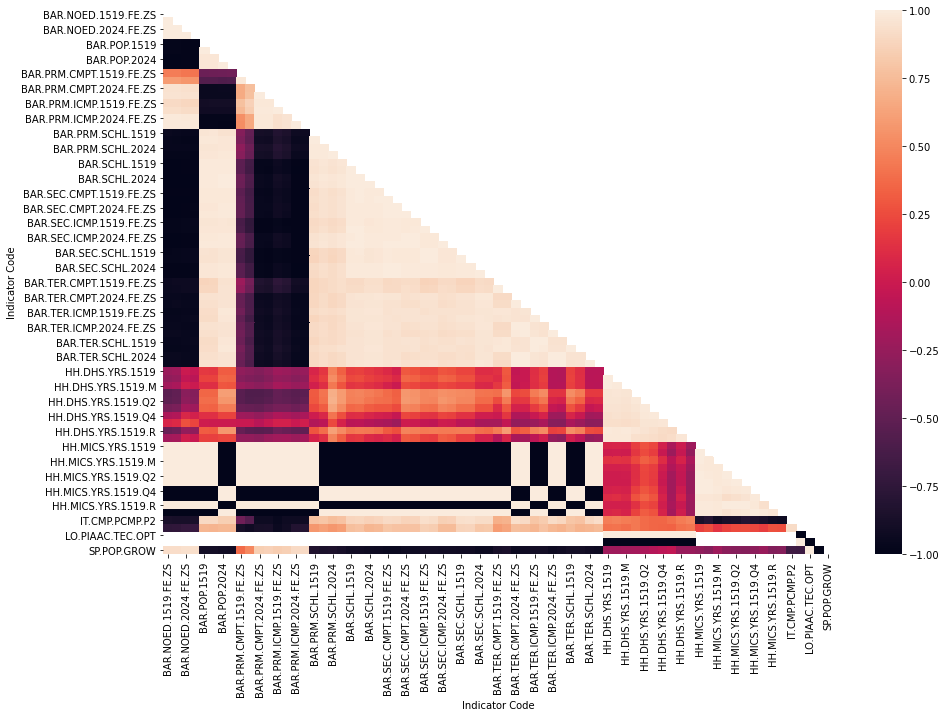

In [27]:
#Faire une figure de corrélation et l'afficher avec hitMAPS
matrix = np.triu(Indicateur_var_transpos.corr())#valeur triangulaire..
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(Indicateur_var_transpos.corr(), annot=False, mask=matrix);

### Pour choisir 4 indicateurs qui nous sembles pertinents: 2 choix
- Lire toutes les descriptions des indicateurs et en extraire 4 pertinents ou
- Regarder les varaibles avec les terminologies (IT, GROW, 1519) et aller voir la description de ces quelques varaibles dans la liste définie précedemment. 

Nous avons opter pour cette deuxième façon de faire et nous avons 4 qui sont: 

 - IT.NET.USER.P2: Utilisateurs d'internet (par 100 personnes)
 - IT.CMP.PCMP.P2: l'accès à l'ordinateur  (par 100 personne)
 - SP.POP.GROW : augmentation de la population (en %)
 - HH.DHS.YRS.1519 : scolarité des lycéens et étudiants entre 15 et 19 ans

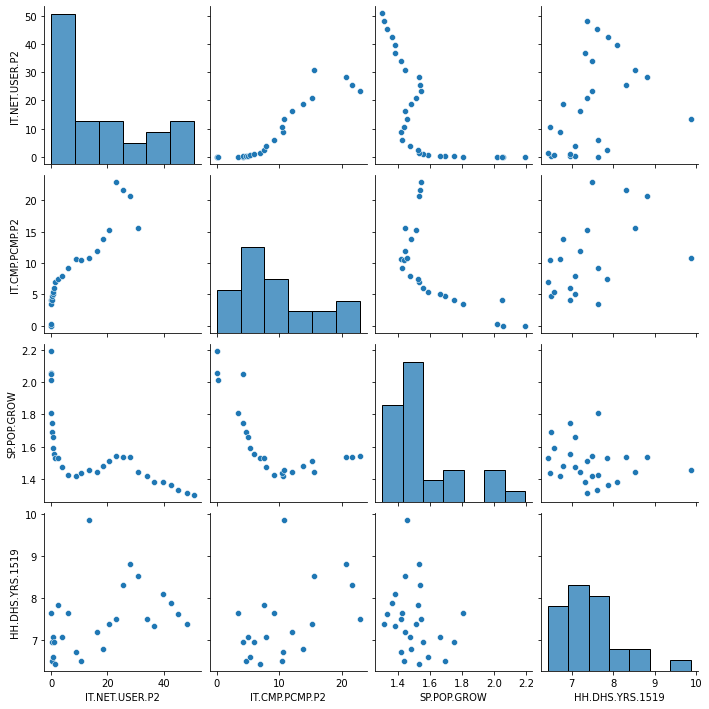

In [28]:
#Choix de quelques indicateurs et vérifions qu'ils ne corrèlent pas entre eux

data_for_pairplot = Indicateur_var_transpos[['IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW','HH.DHS.YRS.1519']]
sns_plot = sns.pairplot(data_for_pairplot)

In [29]:
# Filtre  des valeursen fonction des 4 indicateurs choisis
indicateurs_finals = ['IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW','HH.DHS.YRS.1519']
data_final_ = data_final_[data_final_['Indicator Code'].str.contains('|'.join(indicateurs_finals))]

data_final_


,Region,Income Group,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
48,NaN,NaN,Arab World,ARB,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,Arab World,ARB,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,Arab World,ARB,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,Arab World,ARB,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.Q1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,Arab World,ARB,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.Q2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.505446,NaN,NaN,NaN,NaN,8.542929,NaN
17650,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,DHS: Average years of schooling by age group. ...,HH.DHS.YRS.1519.U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.070494,NaN,NaN,NaN,NaN,10.321154,NaN
17651,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,3.000000,3.500000,4.000000,6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989
17662,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,...,NaN,7.431140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualisation des indicateurs en fonction des indicateurs selon les régions

In [30]:
# classification en fonction des régions et des indicateurs 
regions_Ind_var = data_final_.groupby(['Region','Indicator Code']).mean(numeric_only=True)
regions_Ind_var

1970      1975      1980  \
Region              Indicator Code                                     
East Asia & Pacific HH.DHS.YRS.1519          NaN       NaN       NaN   
                    HH.DHS.YRS.1519.F        NaN       NaN       NaN   
                    HH.DHS.YRS.1519.M        NaN       NaN       NaN   
                    HH.DHS.YRS.1519.Q1       NaN       NaN       NaN   
                    HH.DHS.YRS.1519.Q2       NaN       NaN       NaN   
...                                          ...       ...       ...   
Sub-Saharan Africa  HH.DHS.YRS.1519.R        NaN       NaN       NaN   
                    HH.DHS.YRS.1519.U        NaN       NaN       NaN   
                    IT.CMP.PCMP.P2      0.000000  0.000000  0.000000   
                    IT.NET.USER.P2      0.000000  0.000000  0.000000   
                    SP.POP.GROW         2.481909  2.514305  2.795093   

                                            1985      1990      1991  \
Region              Indicator Code                                     
East Asia & Pacific HH.DHS.YRS.1519          NaN       NaN  8.053973   
                    HH.DHS.YRS.1519.F        NaN       NaN  7.904915   
                    HH.DHS.YRS.1519.M        NaN       NaN  8.216471   
                    HH.DHS.YRS.1519.Q1       NaN       NaN       NaN   
                    HH.DHS.YRS.1519.Q2       NaN       NaN       NaN   
...                                          ...       ...       ...   
Sub-Saharan Africa  HH.DHS.YRS.1519.R        NaN  6.842375  6.136825   
                    HH.DHS.YRS.1519.U        NaN  8.705582  7.307508   
                    IT.CMP.PCMP.P2      0.027482  0.172075  0.388903   
                    IT.NET.USER.P2      0.000000  0.000000  0.003321   
                    SP.POP.GROW         2.832362  2.502165  2.405890   

                                            1992      1993      1994  \
Region              Indicator Code                                     
East Asia & Pacific HH.DHS.YRS.1519          NaN  8.644969  7.994251   
                    HH.DHS.YRS.1519.F        NaN  9.037926  8.031043   
                    HH.DHS.YRS.1519.M        NaN  8.277610  7.957413   
                    HH.DHS.YRS.1519.Q1       NaN  6.343837       NaN   
                    HH.DHS.YRS.1519.Q2       NaN  7.869652       NaN   
...                                          ...       ...       ...   
Sub-Saharan Africa  HH.DHS.YRS.1519.R   5.270569  6.285255  5.366641   
                    HH.DHS.YRS.1519.U   7.374156  7.552125  7.271704   
                    IT.CMP.PCMP.P2      0.519409  0.446896  0.520381   
                    IT.NET.USER.P2      0.012956  0.022749  0.028395   
                    SP.POP.GROW         2.281764  2.258637  2.317288   

                                            1995  ...      2007      2008  \
Region              Indicator Code                ...                       
East Asia & Pacific HH.DHS.YRS.1519          NaN  ...  9.046928  8.503422   
                    HH.DHS.YRS.1519.F        NaN  ...  9.206711  8.959076   
                    HH.DHS.YRS.1519.M        NaN  ...  8.901081  8.083323   
                    HH.DHS.YRS.1519.Q1       NaN  ...  7.331719  6.325181   
                    HH.DHS.YRS.1519.Q2       NaN  ...  8.349605  8.017163   
...                                          ...  ...       ...       ...   
Sub-Saharan Africa  HH.DHS.YRS.1519.R   4.556591  ...  5.726777  6.558340   
                    HH.DHS.YRS.1519.U   6.464269  ...  8.200588  7.992400   
                    IT.CMP.PCMP.P2      0.519712  ...  8.135238  3.911892   
                    IT.NET.USER.P2      0.038983  ...  4.172745  4.860306   
                    SP.POP.GROW         2.403734  ...  2.592605  2.637514   

                                            2009      2010      2011  \
Region              Indicator Code                                     
East Asia & Pacific HH.DHS.YRS.1519     7.768591  7.201374       NaN   
               

In [31]:
#Classification en fonction des région, pays, et indicateurs
regions_Pays_Ind_var = data_final_.groupby(['Region','Country Name','Indicator Code']).mean(numeric_only=True)
regions_Pays_Ind_var

1970      1975  \
Region              Country Name   Indicator Code                           
East Asia & Pacific American Samoa HH.DHS.YRS.1519          NaN       NaN   
                                   HH.DHS.YRS.1519.F        NaN       NaN   
                                   HH.DHS.YRS.1519.M        NaN       NaN   
                                   HH.DHS.YRS.1519.Q1       NaN       NaN   
                                   HH.DHS.YRS.1519.Q2       NaN       NaN   
...                                                         ...       ...   
Sub-Saharan Africa  Zimbabwe       HH.DHS.YRS.1519.R        NaN       NaN   
                                   HH.DHS.YRS.1519.U        NaN       NaN   
                                   IT.CMP.PCMP.P2           NaN       NaN   
                                   IT.NET.USER.P2           NaN       NaN   
                                   SP.POP.GROW         3.261985  3.230955   

                                                           1980      1985  \
Region              Country Name   Indicator Code                           
East Asia & Pacific American Samoa HH.DHS.YRS.1519          NaN       NaN   
                                   HH.DHS.YRS.1519.F        NaN       NaN   
                                   HH.DHS.YRS.1519.M        NaN       NaN   
                                   HH.DHS.YRS.1519.Q1       NaN       NaN   
                                   HH.DHS.YRS.1519.Q2       NaN       NaN   
...                                                         ...       ...   
Sub-Saharan Africa  Zimbabwe       HH.DHS.YRS.1519.R        NaN       NaN   
                                   HH.DHS.YRS.1519.U        NaN       NaN   
                                   IT.CMP.PCMP.P2           NaN       NaN   
                                   IT.NET.USER.P2           NaN       NaN   
                                   SP.POP.GROW         3.441809  3.725636   

                                                           1990      1991  \
Region              Country Name   Indicator Code                           
East Asia & Pacific American Samoa HH.DHS.YRS.1519          NaN       NaN   
                                   HH.DHS.YRS.1519.F        NaN       NaN   
                                   HH.DHS.YRS.1519.M        NaN       NaN   
                                   HH.DHS.YRS.1519.Q1       NaN       NaN   
                                   HH.DHS.YRS.1519.Q2       NaN       NaN   
...                                                         ...       ...   
Sub-Saharan Africa  Zimbabwe       HH.DHS.YRS.1519.R        NaN       NaN   
                                   HH.DHS.YRS.1519.U        NaN       NaN   
                                   IT.CMP.PCMP.P2      0.019117  0.046585   
                                   IT.NET.USER.P2      0.000000       NaN   
                                   SP.POP.GROW         2.793947  2.520526   

                                                           1992      1993  \
Region              Country Name   Indicator Code                           
East Asia & Pacific American Samoa HH.DHS.YRS.1519          NaN       NaN   
                                   HH.DHS.YRS.1519.F        NaN       NaN   
                                   HH.DHS.YRS.1519.M        NaN       NaN   
                                   HH.DHS.YRS.1519.Q1       NaN       NaN   
                                   HH.DHS.YRS.1519.Q2       NaN       NaN   
...                                                         ...       ...   
Sub-Saharan Africa  Zimbabwe       HH.DHS.YRS.1519.R        NaN       NaN   
                                   HH.DHS.YRS.1519.U        NaN       NaN   
                                   IT.CMP.PCMP.P2      0.118383  0.160559   
                                   IT.NET.USER.P2           NaN       NaN   
                                   SP.POP.GROW         2.270532  2.064939   

                                                   

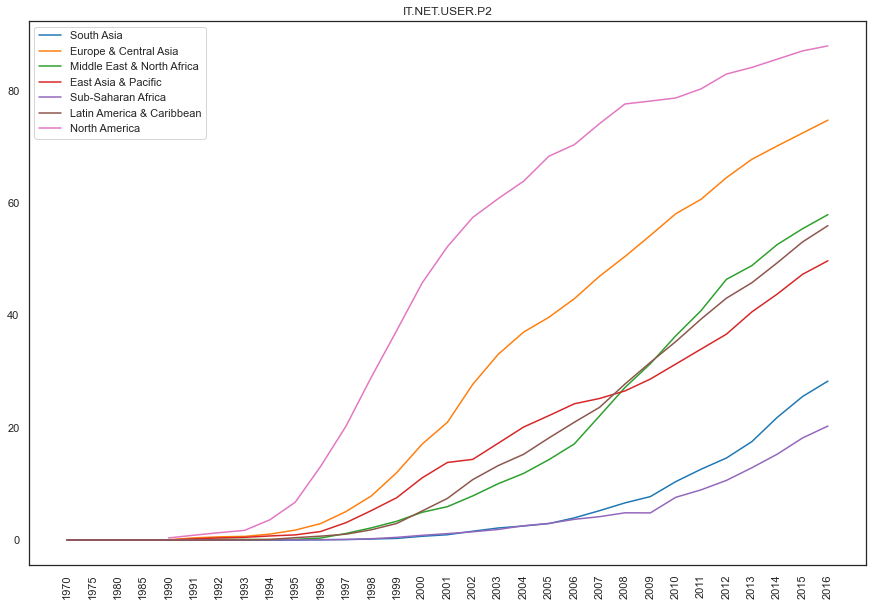

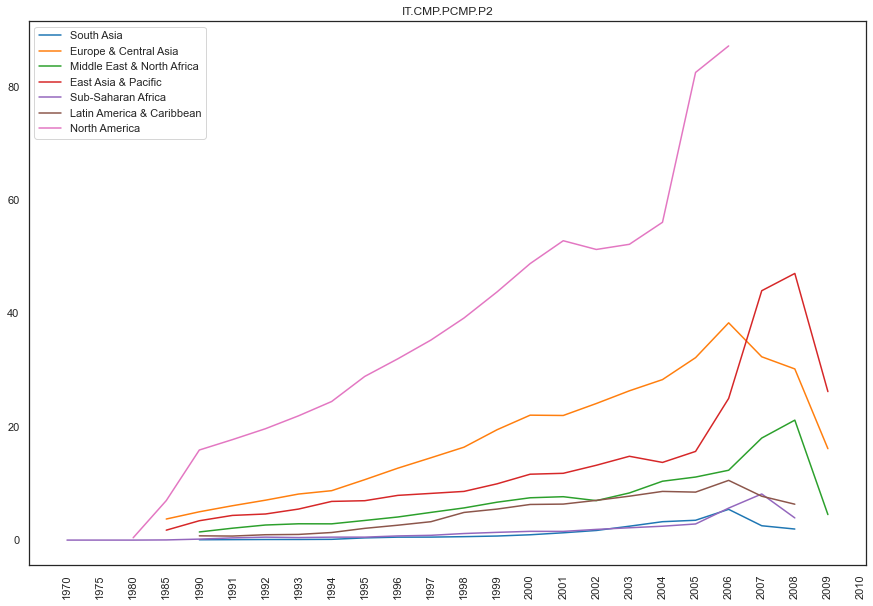

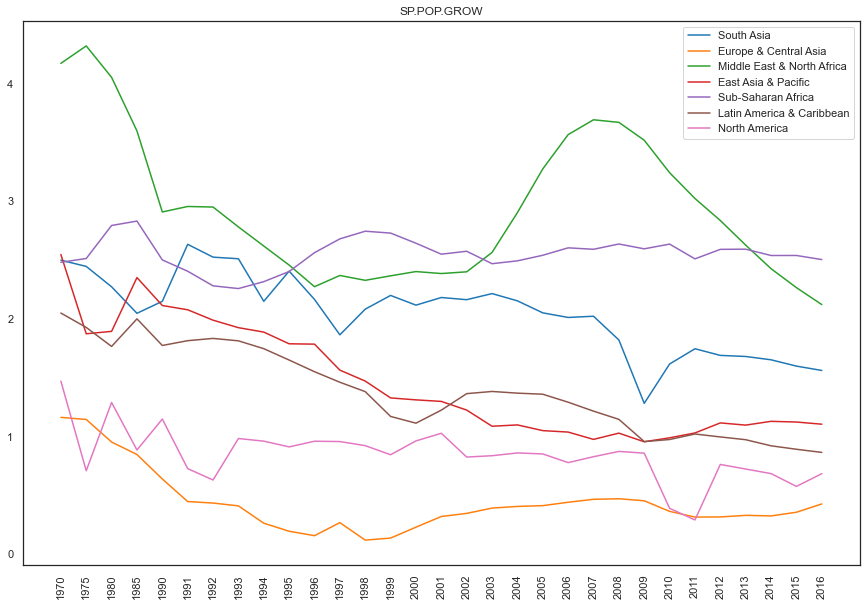

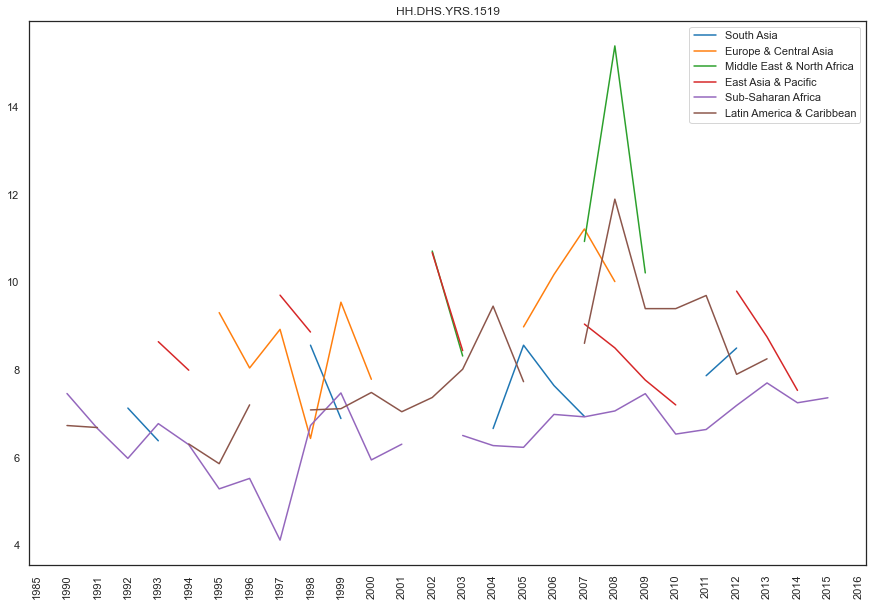

In [32]:
sns.set_theme(style="white", palette=None)
#Indicateurs choisis: Utilisateurs d'internet, Ordi perso, augmentation de la population %, Années de scolarité moyennes par groupe d’âge. Age 15-19
#Selection des indicateurs en fonction du code de l'indicateur.
indicators = ['IT.NET.USER.P2','IT.CMP.PCMP.P2','SP.POP.GROW','HH.DHS.YRS.1519']
#indicators = ['IT.NET.USER.P2']
for indicator in indicators:  
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes()
    plt.title(indicator)
    degrees = 90
    plt.xticks(rotation=degrees)
    for region in data_final_['Region'].dropna().unique():
        if len(regions_Ind_var.loc[region,indicator].dropna())>0:
            ax.plot(regions_Ind_var.loc[region,indicator], label=region)
            plt.legend()

## Filtre final

In [33]:
# Je ne garde que le pays, l'indicateur et les dates
data_final_nettoye= data_final_.drop(["Region", "Income Group","Country Code","Indicator Name"], axis=1)
data_final_nettoye

,Country Name,Indicator Code,1970,1975,1980,1985,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
48,Arab World,HH.DHS.YRS.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Arab World,HH.DHS.YRS.1519.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Arab World,HH.DHS.YRS.1519.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Arab World,HH.DHS.YRS.1519.Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Arab World,HH.DHS.YRS.1519.Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,Zimbabwe,HH.DHS.YRS.1519.R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.505446,NaN,NaN,NaN,NaN,8.542929,NaN
17650,Zimbabwe,HH.DHS.YRS.1519.U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.070494,NaN,NaN,NaN,NaN,10.321154,NaN
17651,Zimbabwe,IT.NET.USER.P2,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,3.000000,3.500000,4.000000,6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989
17662,Zimbabwe,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,0.019117,0.046585,0.118383,0.160559,...,NaN,7.431140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Suppression des lignes qui ont n'ont pas au moins 36 valeurs non nulles (en tenant en compte le pays et l'indicateur)
data_final_nettoye=data_final_nettoye.dropna(thresh=3)                                      
data_final_nettoye

,Country Name,Indicator Code,1970,1975,1980,1985,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
58,Arab World,IT.NET.USER.P2,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN,NaN
69,Arab World,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Arab World,SP.POP.GROW,2.767219,2.948191,3.205090,2.901453,3.541847,2.701009,1.746289,2.581814,...,2.386344,2.381136,2.323576,2.230786,2.128048,2.063874,2.012570,NaN,NaN,NaN
131,East Asia & Pacific,IT.NET.USER.P2,NaN,NaN,NaN,NaN,0.007288,NaN,NaN,0.079278,...,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924,52.796321
142,East Asia & Pacific,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,0.827378,0.957449,1.059987,1.234398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,Zimbabwe,HH.DHS.YRS.1519.R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.505446,NaN,NaN,NaN,NaN,8.542929,NaN
17650,Zimbabwe,HH.DHS.YRS.1519.U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.070494,NaN,NaN,NaN,NaN,10.321154,NaN
17651,Zimbabwe,IT.NET.USER.P2,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,3.000000,3.500000,4.000000,6.400000,8.400000,12.000000,15.500000,16.364740,22.742818,23.119989
17662,Zimbabwe,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,0.019117,0.046585,0.118383,0.160559,...,NaN,7.431140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse exploratoire


- Nous allons choisir la dernière valeur dans le temps de chaque indicateur selon le pays

In [35]:
# choix de la dernière valeur non NaN dans le temps de chaque indicateur
data_final_value=data_final_nettoye.ffill(axis=1).iloc[:, -1]
# Ces valeurs vont donc être stockée dans une colonne dont le nom est la dernière date, c'est à dire
# 2016, on va donc changer le nom de cette valeur pour lui donner le nom Valeurs
data_final_value = pd.DataFrame(data_final_value)# Conversion en dataFrame
data_final_last_NNaN_Values=data_final_value.rename(columns={'2016':'Valeurs'})
data_final_last_NNaN_Values

,Valeurs
58,36.868602
69,6.676681
72,2.01257
131,52.796321
142,7.953008
...,...
17649,8.542929
17650,10.321154
17651,23.119989
17662,7.43114


In [36]:
#On enlever toutes les autres valeurs de la data_final_nettoye en ne gardant que les pays et les indicateurs 
# dans le même ordre...
data_final_Country_Indic = data_final_nettoye[['Country Name','Indicator Code']]
data_final_Country_Indic

,Country Name,Indicator Code
58,Arab World,IT.NET.USER.P2
69,Arab World,IT.CMP.PCMP.P2
72,Arab World,SP.POP.GROW
131,East Asia & Pacific,IT.NET.USER.P2
142,East Asia & Pacific,IT.CMP.PCMP.P2
...,...,...
17649,Zimbabwe,HH.DHS.YRS.1519.R
17650,Zimbabwe,HH.DHS.YRS.1519.U
17651,Zimbabwe,IT.NET.USER.P2
17662,Zimbabwe,IT.CMP.PCMP.P2


In [37]:
# On concatène les les pays-indicateurs avec les données des valeurs
final_dataset =  pd.concat([data_final_Country_Indic, data_final_last_NNaN_Values], axis=1, join="inner")
#final_dataset_Scores=final_dataset_Scores[['Valeurs']]
final_dataset



,Country Name,Indicator Code,Valeurs
58,Arab World,IT.NET.USER.P2,36.868602
69,Arab World,IT.CMP.PCMP.P2,6.676681
72,Arab World,SP.POP.GROW,2.01257
131,East Asia & Pacific,IT.NET.USER.P2,52.796321
142,East Asia & Pacific,IT.CMP.PCMP.P2,7.953008
...,...,...,...
17649,Zimbabwe,HH.DHS.YRS.1519.R,8.542929
17650,Zimbabwe,HH.DHS.YRS.1519.U,10.321154
17651,Zimbabwe,IT.NET.USER.P2,23.119989
17662,Zimbabwe,IT.CMP.PCMP.P2,7.43114


In [38]:
#Les valeurs de l'indicateurs internets en fonction de chaque pays

#Sélection de l'indicateur IT.NET.USER.P2
Val_Indic1 = final_dataset[final_dataset["Indicator Code"] == 'IT.NET.USER.P2'].iloc[:,:].dropna(axis=1,how = "all")
# Je renomme les valeurs sous l'indicateur en question
Val_Indic1=Val_Indic1.rename(columns={'Valeurs':'Accès Internet'})
# Je garde que le pays et les valeurs de l'indicateur
Val_Indic1 = Val_Indic1[['Country Name','Accès Internet']]
Val_Indic1


,Country Name,Accès Internet
58,Arab World,36.868602
131,East Asia & Pacific,52.796321
204,East Asia & Pacific (excluding high income),48.386621
277,Euro area,80.446726
350,Europe & Central Asia,73.914751
...,...,...
17359,Virgin Islands (U.S.),59.608316
17432,West Bank and Gaza,61.178385
17505,"Yemen, Rep.",24.579208
17578,Zambia,25.506579


In [39]:
#Les valeurs de l'indicateurs possession ordi en fonction de chaque pays

#Sélection de l'indicateur IT.CMP.PCMP.P2
Val_Indic2 = final_dataset[final_dataset["Indicator Code"] == 'IT.CMP.PCMP.P2'].iloc[:,:].dropna(axis=1,how = "all")
# Je renomme les valeurs sous l'indicateur en question
Val_Indic2=Val_Indic2.rename(columns={'Valeurs':'Possession Ordi'})
# Je garde que le pays et les valeurs de l'indicateur
Val_Indic2 = Val_Indic2[['Country Name','Possession Ordi']]
Val_Indic2

,Country Name,Possession Ordi
69,Arab World,6.676681
142,East Asia & Pacific,7.953008
215,East Asia & Pacific (excluding high income),5.495883
288,Euro area,54.939223
361,Europe & Central Asia,34.330533
...,...,...
17370,Virgin Islands (U.S.),2.783758
17443,West Bank and Gaza,5.47775
17516,"Yemen, Rep.",2.903922
17589,Zambia,1.142108


In [40]:
#Les valeurs de l'indicateurs possession ordi en fonction de chaque pays

#Sélection de l'indicateur IT.CMP.PCMP.P2
Val_Indic2 = final_dataset[final_dataset["Indicator Code"] == 'IT.CMP.PCMP.P2'].iloc[:,:].dropna(axis=1,how = "all")
# Je renomme les valeurs sous l'indicateur en question
Val_Indic2=Val_Indic2.rename(columns={'Valeurs':'Possession Ordi'})
# Je garde que le pays et les valeurs de l'indicateur
Val_Indic2 = Val_Indic2[['Country Name','Possession Ordi']]
Val_Indic2

,Country Name,Possession Ordi
69,Arab World,6.676681
142,East Asia & Pacific,7.953008
215,East Asia & Pacific (excluding high income),5.495883
288,Euro area,54.939223
361,Europe & Central Asia,34.330533
...,...,...
17370,Virgin Islands (U.S.),2.783758
17443,West Bank and Gaza,5.47775
17516,"Yemen, Rep.",2.903922
17589,Zambia,1.142108


In [41]:
#Les valeurs de l'indicateurs scolarisaion en fonction de chaque pays

#Sélection de l'indicateur HH.DHS.YRS.1519
Val_Indic3 = final_dataset[final_dataset["Indicator Code"] == 'HH.DHS.YRS.1519'].iloc[:,:].dropna(axis=1,how = "all")
# Je renomme les valeurs sous l'indicateur en question
Val_Indic3=Val_Indic3.rename(columns={'Valeurs':'Scolarisation'})
# Je garde que le pays et les valeurs de l'indicateur
Val_Indic3 = Val_Indic3[['Country Name','Scolarisation']]
Val_Indic3

,Country Name,Scolarisation
1946,Albania,10.017947
2457,Armenia,10.668431
2749,Azerbaijan,10.17909
2968,Bangladesh,7.097777
3333,Benin,7.8
...,...,...
16692,Ukraine,11.219032
17057,Uzbekistan,8.04512
17276,Vietnam,12.672026
17568,Zambia,7.676011


In [47]:
#Les valeurs de l'indicateurs scolarisaion en fonction de chaque pays

#Sélection de l'indicateur SP.POP.GROW
Val_Indic4 = final_dataset[final_dataset["Indicator Code"] == 'SP.POP.GROW'].iloc[:,:].dropna(axis=1,how = "all")
# Je renomme les valeurs sous l'indicateur en question
Val_Indic4=Val_Indic4.rename(columns={'Valeurs':'Population'})
# Je garde que le pays et les valeurs de l'indicateur
Val_Indic4 = Val_Indic4[['Country Name','Population']]
Val_Indic4

,Country Name,Population
72,Arab World,2.01257
145,East Asia & Pacific,0.683098
218,East Asia & Pacific (excluding high income),0.730576
291,Euro area,0.405101
364,Europe & Central Asia,0.503675
...,...,...
17373,Virgin Islands (U.S.),-0.603319
17446,West Bank and Gaza,2.884693
17519,"Yemen, Rep.",2.451502
17592,Zambia,3.002816


In [42]:
# Nous allons maintenant concatener les différentes valeurs obtenues

#Pour cela, commençons par selectionner tous les pays 
final_dataset_contry=final_dataset['Country Name'].unique()
column_names = ["Country Name"]
final_dataset_contry=pd.DataFrame(final_dataset_contry, columns=column_names)
#final_dataset_contry=final_dataset_contry.rename(columns={'0':'Pays'})
final_dataset_contry


,Country Name
0,Arab World
1,East Asia & Pacific
2,East Asia & Pacific (excluding high income)
3,Euro area
4,Europe & Central Asia
...,...
235,Virgin Islands (U.S.)
236,West Bank and Gaza
237,"Yemen, Rep."
238,Zambia


In [43]:
# Data final comprennant les pays et les valeurs de l'indicateur internet
data_final_Ind_1 = pd.merge(final_dataset_contry,Val_Indic1,how="left", on=["Country Name"])
data_final_Ind_1

,Country Name,Accès Internet
0,Arab World,36.868602
1,East Asia & Pacific,52.796321
2,East Asia & Pacific (excluding high income),48.386621
3,Euro area,80.446726
4,Europe & Central Asia,73.914751
...,...,...
235,Virgin Islands (U.S.),59.608316
236,West Bank and Gaza,61.178385
237,"Yemen, Rep.",24.579208
238,Zambia,25.506579


In [44]:
# Data final comprennant les pays et les valeurs de l'indicateur internet + Possession Ordi
data_final_Ind_1_2 = pd.merge(data_final_Ind_1,Val_Indic2,how="left", on=["Country Name"])
data_final_Ind_1_2

,Country Name,Accès Internet,Possession Ordi
0,Arab World,36.868602,6.676681
1,East Asia & Pacific,52.796321,7.953008
2,East Asia & Pacific (excluding high income),48.386621,5.495883
3,Euro area,80.446726,54.939223
4,Europe & Central Asia,73.914751,34.330533
...,...,...,...
235,Virgin Islands (U.S.),59.608316,2.783758
236,West Bank and Gaza,61.178385,5.47775
237,"Yemen, Rep.",24.579208,2.903922
238,Zambia,25.506579,1.142108


In [45]:
# Data final comprennant les pays et les valeurs de l'indicateur internet + Possession Ordi+Scolarisation
data_final_Ind_1_2_3 = pd.merge(data_final_Ind_1_2,Val_Indic3,how="left", on=["Country Name"])
data_final_Ind_1_2_3

,Country Name,Accès Internet,Possession Ordi,Scolarisation
0,Arab World,36.868602,6.676681,NaN
1,East Asia & Pacific,52.796321,7.953008,NaN
2,East Asia & Pacific (excluding high income),48.386621,5.495883,NaN
3,Euro area,80.446726,54.939223,NaN
4,Europe & Central Asia,73.914751,34.330533,NaN
...,...,...,...,...
235,Virgin Islands (U.S.),59.608316,2.783758,NaN
236,West Bank and Gaza,61.178385,5.47775,NaN
237,"Yemen, Rep.",24.579208,2.903922,NaN
238,Zambia,25.506579,1.142108,7.676011


In [48]:
# Data final comprennant les pays et les valeurs de tous les indicateurs
data_final_Ind_1_2_3_4 = pd.merge(data_final_Ind_1_2_3,Val_Indic4,how="left", on=["Country Name"])
data_final_Ind_1_2_3_4

,Country Name,Accès Internet,Possession Ordi,Scolarisation,Population
0,Arab World,36.868602,6.676681,NaN,2.01257
1,East Asia & Pacific,52.796321,7.953008,NaN,0.683098
2,East Asia & Pacific (excluding high income),48.386621,5.495883,NaN,0.730576
3,Euro area,80.446726,54.939223,NaN,0.405101
4,Europe & Central Asia,73.914751,34.330533,NaN,0.503675
...,...,...,...,...,...
235,Virgin Islands (U.S.),59.608316,2.783758,NaN,-0.603319
236,West Bank and Gaza,61.178385,5.47775,NaN,2.884693
237,"Yemen, Rep.",24.579208,2.903922,NaN,2.451502
238,Zambia,25.506579,1.142108,7.676011,3.002816


In [49]:
#Normalisation de toutes les colonnes de la data final avec les différents indicateurs entre 0 et 1
#Normalisation
data_final_normalise = data_final_Ind_1_2_3_4.copy() 

column1 = 'Accès Internet'
data_final_normalise[column1] = (data_final_normalise[column1] - data_final_normalise[column1].min()) / (data_final_normalise[column1].max() - data_final_normalise[column1].min()) 
column2 = 'Possession Ordi'
data_final_normalise[column2] = (data_final_normalise[column2] - data_final_normalise[column2].min()) / (data_final_normalise[column2].max() - data_final_normalise[column2].min()) 
column3 = 'Scolarisation'
data_final_normalise[column3] = (data_final_normalise[column3] - data_final_normalise[column3].min()) / (data_final_normalise[column3].max() - data_final_normalise[column3].min()) 
column4 = 'Population'
data_final_normalise[column4] = (data_final_normalise[column4] - data_final_normalise[column4].min()) / (data_final_normalise[column4].max() - data_final_normalise[column4].min()) 
display(data_final_normalise) 

,Country Name,Accès Internet,Possession Ordi,Scolarisation,Population
0,Arab World,0.375291,0.06921,NaN,0.543117
1,East Asia & Pacific,0.537422,0.082485,NaN,0.353606
2,East Asia & Pacific (excluding high income),0.492535,0.056929,NaN,0.360374
3,Euro area,0.818879,0.571169,NaN,0.313978
4,Europe & Central Asia,0.752389,0.356827,NaN,0.32803
...,...,...,...,...,...
235,Virgin Islands (U.S.),0.606762,0.028722,NaN,0.170232
236,West Bank and Gaza,0.622744,0.056741,NaN,0.667435
237,"Yemen, Rep.",0.250195,0.029971,NaN,0.605685
238,Zambia,0.259635,0.011648,0.394294,0.684273


## Notation et classement

La notation de l'ensemble des indicateurs sera de 100

Nous férons une notation de la sorte: 
 - On attribuera une note de 30 à l'accès à internet
 - On attribuera une note de 30 à la possession d'un ordi
 - On attribuera une note de 20 à la scolarisation
 - On attribuera une note de 20 à la population



In [50]:
data_final_normalise_Ind_Score=data_final_normalise.copy() 
data_final_normalise_Ind_Score['Accès Internet'] = data_final_normalise_Ind_Score['Accès Internet'] * 30
data_final_normalise_Ind_Score['Possession Ordi'] = data_final_normalise_Ind_Score['Possession Ordi'] * 30
data_final_normalise_Ind_Score['Scolarisation'] = data_final_normalise_Ind_Score['Scolarisation'] * 20
data_final_normalise_Ind_Score['Population'] = data_final_normalise_Ind_Score['Population'] * 20
data_final_normalise_Ind_Score

,Country Name,Accès Internet,Possession Ordi,Scolarisation,Population
0,Arab World,11.258732,2.076311,NaN,10.862346
1,East Asia & Pacific,16.122652,2.474548,NaN,7.072116
2,East Asia & Pacific (excluding high income),14.776042,1.707882,NaN,7.207472
3,Euro area,24.566382,17.13507,NaN,6.279568
4,Europe & Central Asia,22.571683,10.704798,NaN,6.560594
...,...,...,...,...,...
235,Virgin Islands (U.S.),18.202862,0.861651,NaN,3.404635
236,West Bank and Gaza,18.682321,1.702224,NaN,13.348706
237,"Yemen, Rep.",7.505864,0.899144,NaN,12.11371
238,Zambia,7.78906,0.349427,7.885876,13.685465


In [51]:
#Suprimons les pays n'ayant pas de scolarisation dans un premier temps
data_final_normalise_Ind_Score.dropna()

,Country Name,Accès Internet,Possession Ordi,Scolarisation,Population
26,Albania,20.265707,1.426334,13.564503,4.668846
33,Armenia,18.933222,3.06676,15.141768,5.892415
37,Azerbaijan,23.880289,2.447774,13.955235,8.44192
40,Bangladesh,5.57215,0.746898,6.483799,8.204127
45,Benin,3.662677,0.208069,8.186519,13.003291
...,...,...,...,...,...
226,Ukraine,16.026608,1.405131,16.476842,4.179912
231,Uzbekistan,14.288868,0.976243,8.780875,10.084673
234,Vietnam,14.199916,2.947039,20.0,8.178833
238,Zambia,7.78906,0.349427,7.885876,13.685465


In [52]:
#Calcul du score moyen de chaque indicateur
data_final_normalise_Ind_Score_moyen=data_final_normalise_Ind_Score.copy() 
data_final_normalise_Ind_Score_moyen['Score'] = data_final_normalise_Ind_Score_moyen[['Accès Internet', 'Possession Ordi','Scolarisation','Population']].mean(axis=1)
data_final_normalise_Ind_Score_moyen




,Country Name,Accès Internet,Possession Ordi,Scolarisation,Population,Score
0,Arab World,11.258732,2.076311,NaN,10.862346,8.065796
1,East Asia & Pacific,16.122652,2.474548,NaN,7.072116,8.556439
2,East Asia & Pacific (excluding high income),14.776042,1.707882,NaN,7.207472,7.897132
3,Euro area,24.566382,17.13507,NaN,6.279568,15.993673
4,Europe & Central Asia,22.571683,10.704798,NaN,6.560594,13.279025
...,...,...,...,...,...,...
235,Virgin Islands (U.S.),18.202862,0.861651,NaN,3.404635,7.489716
236,West Bank and Gaza,18.682321,1.702224,NaN,13.348706,11.244417
237,"Yemen, Rep.",7.505864,0.899144,NaN,12.11371,6.839573
238,Zambia,7.78906,0.349427,7.885876,13.685465,7.427457


In [53]:
# Classement

# Je ne garde que le pays, l'indicateur et les scores
data_classement= data_final_normalise_Ind_Score_moyen.drop(["Accès Internet", "Possession Ordi","Scolarisation","Population"], axis=1)
data_classement['Classement'] = data_classement['Score'].rank(ascending = 0) 
data_classement = data_classement.set_index('Classement') 
data_classement = data_classement.sort_index() 
data_classement.head(20)


,Country Name,Score
Classement,,
1.0,Switzerland,21.832639
2.0,Canada,21.827439
3.0,Sweden,21.176928
4.0,Luxembourg,20.928681
5.0,Netherlands,20.811519
6.0,Bahrain,20.695038
7.0,United Kingdom,20.430371
8.0,Norway,18.947423
9.0,North America,18.769096


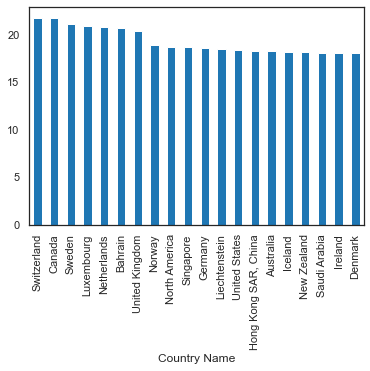

In [54]:
data_histogram=data_classement.set_index("Country Name")
histo=data_histogram["Score"].iloc[:20]
histo.plot.bar()
plt.show()